In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv('./data/merged_weather_tweets.csv')
df.head()

,Unnamed: 0,datetime,text,regex_clean_tweets,lemmed_tweet,temperature_f,wind_dir_degrees,wind_speed_mph,broken_clouds,drizzle,...,smoke,snow,squalls,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_drizzle,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain,outage
0,0,2012-10-06 13:00:00,Partial power outage at #MediaLoft That's...,Partial power outage MediaLoft That twice week...,Partial power outage MediaLoft That twice week...,61.55,56.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,1,2012-10-12 01:00:00,"Um, can someone call ConEd , there's a power...",Um someone call ConEd power outage Bronx Sourc...,Um someone call ConEd power outage Bronx Sourc...,59.48,260.0,15,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,2,2012-10-20 23:00:00,Power outage took over my entire block as s...,Power outage took entire block soon loaded Con...,Power outage took entire block soon loaded Con...,65.86,170.0,11,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,3,2012-10-26 15:00:00,Mayor: A major concern given this type of stor...,Mayor A major concern given type storm possibi...,Mayor A major concern given type storm possibi...,59.88,40.0,6,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,4,2012-10-26 15:00:00,A major concern given this storm is the possib...,A major concern given storm possibility prolon...,A major concern given storm possibility prolon...,59.88,40.0,6,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [3]:
df.shape

(45545, 45)

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.shape

(45545, 44)

In [ ]:
# df.drop(
#     columns=['Unnamed: 0', 'geopolitical_ents', 'proper_nouns', 'lemmed_tweet', 'nouns'], 
#     inplace=True)



In [6]:
df.columns

Index(['datetime', 'text', 'regex_clean_tweets', 'lemmed_tweet',
       'temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken_clouds',
       'drizzle', 'dust', 'few_clouds', 'fog', 'freezing_rain', 'haze',
       'heavy_intensity_drizzle', 'heavy_intensity_rain', 'heavy_snow',
       'heavy_thunderstorm', 'light_intensity_drizzle',
       'light_intensity_shower_rain', 'light_rain', 'light_rain_and_snow',
       'light_snow', 'mist', 'moderate_rain', 'overcast_clouds',
       'proximity_thunderstorm', 'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'thunderstorm', 'thunderstorm_with_heavy_rain',
       'thunderstorm_with_light_drizzle', 'thunderstorm_with_light_rain',
       'thunderstorm_with_rain', 'very_heavy_rain', 'outage'],
      dtype='object')

In [8]:
# extracting all the features except the text data and the target vector 
# we need this later for the PCA
features = df.columns[4:43]

In [9]:
features

Index(['temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken_clouds',
       'drizzle', 'dust', 'few_clouds', 'fog', 'freezing_rain', 'haze',
       'heavy_intensity_drizzle', 'heavy_intensity_rain', 'heavy_snow',
       'heavy_thunderstorm', 'light_intensity_drizzle',
       'light_intensity_shower_rain', 'light_rain', 'light_rain_and_snow',
       'light_snow', 'mist', 'moderate_rain', 'overcast_clouds',
       'proximity_thunderstorm', 'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'thunderstorm', 'thunderstorm_with_heavy_rain',
       'thunderstorm_with_light_drizzle', 'thunderstorm_with_light_rain',
       'thunderstorm_with_rain', 'very_heavy_rain'],
      dtype='object')

In [10]:
X = df['regex_clean_tweets']
y = df['outage']

## Baseline Score

In [11]:
y.value_counts(normalize=True)

0.0    0.987968
1.0    0.012032
Name: outage, dtype: float64

## Model with only Text Data

In [12]:
y.value_counts()

0.0    44997
1.0      548
Name: outage, dtype: int64

In [13]:
# what the class weight parameter in the estimator
# does under the hood
#len(y) / (2 * np.bincount(y))

array([ 0.50608929, 41.55565693])

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split
 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, stratify=y)

In [26]:
X_train.shape

(27327,)

In [27]:
X_test.shape

(18218,)

In [145]:
def classifier(X, y):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, stratify=y)
    
    
    pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('clf', LogisticRegression(class_weight='balanced', random_state=42))
    ])

    pipe_params = {
    'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tvec__max_features': [500, 1000, 2000],
    'tvec__min_df': [1, 2, 3],
    'tvec__max_df': [1.0, 0.8, 0.6],
    'clf__C': [1.0, 0.8, 0.4],
    'clf__class_weight': [{0: 0.3, 1: 0.7}, {0: 0.2, 1: 0.8}, {0: 0.1, 1: 0.9}]
    }

    gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)

    gs.fit(X_train, y_train)

    print(f'The Accuracy score is: {round(gs.score(X_train, y_train), 2)}')

    print(gs.best_params_)
    print(f'The cross_val_score is: {round(gs.best_score_, 2)}')
    #y_predpr_lr = gs.best_estimator_.predict_proba(X_test)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, gs.best_estimator_.predict(X_test)).ravel()



    accuracy = round((tn + tp) / (tn + fp + fn + tp), 2)
    misclassification = round((1 - accuracy), 2)
    sensitivity = round((tp) / (tp + fn), 2)
    specificity = round((tn) / (tn + fp), 2)
    precision = round((tp) / (tp + fp), 2)

    print(f'The Accuracy is: {accuracy}')
    print(f'The Missclassification Rate is: {misclassification}')
    print(f'The Sensitivity/Recall is: {sensitivity}')
    print(f'The Specificity is: {specificity}')
    print(f'The Precision is: {precision}')


    fpr_clf, tpr_clf, _ = roc_curve(y_test, gs.best_estimator_.predict_proba(X_test)[:, 1])
    roc_auc_clf = auc(fpr_clf, tpr_clf)

    plt.figure(figsize = (10, 7))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_clf, tpr_clf, lw=3, label='The ROC curve (area = {:0.2f})'.format(roc_auc_clf))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (Power Outage Related Tweets)', fontsize=18)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

    print(classification_report(y_test, gs.best_estimator_.predict(X_test)))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The Accuracy score is: 0.99
{'clf__C': 1.0, 'clf__class_weight': {0: 0.2, 1: 0.8}, 'tvec__max_df': 1.0, 'tvec__max_features': 500, 'tvec__min_df': 1, 'tvec__ngram_range': (1, 1)}
The cross_val_score is: 0.99
The Accuracy is: 0.99
The Missclassification Rate is: 0.01
The Sensitivity/Recall is: 0.04
The Specificity is: 1.0
The Precision is: 0.6
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     17999
         1.0       0.60      0.04      0.08       219

   micro avg       0.99      0.99      0.99     18218
   macro avg       0.79      0.52      0.54     18218
weighted avg       0.98      0.99      0.98     18218



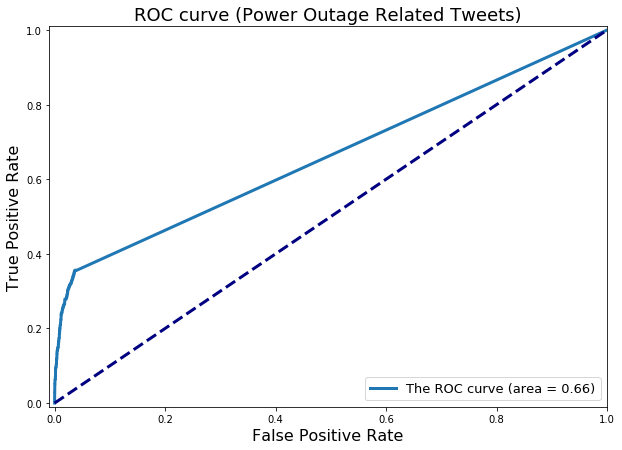

In [146]:
classifier(X, y)

In [51]:
from sklearn.model_selection import cross_val_score

In [43]:
tvec = TfidfVectorizer()
X_train_vec = tvec.fit_transform(X_train)
X_test_vec = tvec.transform(X_test)

In [44]:
X_train_vec.todense().shape

(27327, 2994)

In [45]:
len(tvec.get_feature_names())

2994

In [47]:
X_train_tvec = pd.DataFrame(X_train_vec.todense(), columns=tvec.get_feature_names())

In [172]:
lr = LogisticRegression(solver='lbfgs', class_weight={0: 0.3, 1: 0.7})

In [173]:
lr.fit(X_train_tvec, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.3, 1: 0.7}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [174]:
cross_val_score(lr, X_train_tvec, y_train, cv=10).mean()

0.987960647138592

In [175]:
lr.score(X_train_tvec, y_train)

0.9880338127127017

In [176]:
lr.score(X_test_vec, y_test)

0.9880338127127017

The Accuracy is: 0.99
The Missclassification Rate is: 0.01
The Sensitivity/Recall is: 0.0
The Specificity is: 1.0
The Precision is: 1.0
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     17999
         1.0       1.00      0.00      0.01       219

   micro avg       0.99      0.99      0.99     18218
   macro avg       0.99      0.50      0.50     18218
weighted avg       0.99      0.99      0.98     18218



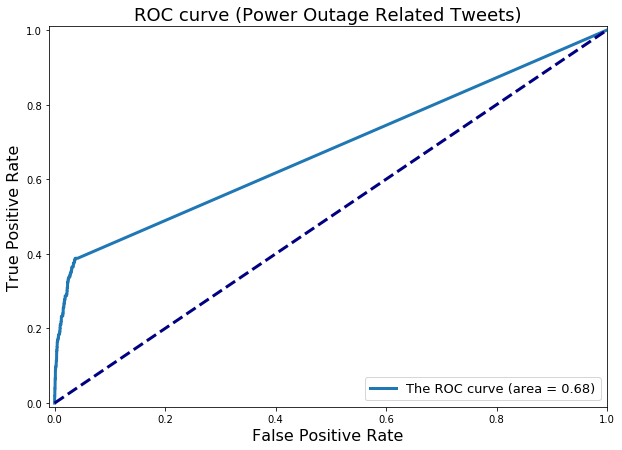

In [171]:
tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(X_test_vec)).ravel()



accuracy = round((tn + tp) / (tn + fp + fn + tp), 2)
misclassification = round((1 - accuracy), 2)
sensitivity = round((tp) / (tp + fn), 2)
specificity = round((tn) / (tn + fp), 2)
precision = round((tp) / (tp + fp), 2)

print(f'The Accuracy is: {accuracy}')
print(f'The Missclassification Rate is: {misclassification}')
print(f'The Sensitivity/Recall is: {sensitivity}')
print(f'The Specificity is: {specificity}')
print(f'The Precision is: {precision}')


fpr_clf, tpr_clf, _ = roc_curve(y_test, lr.predict_proba(X_test_vec)[:, 1])
roc_auc_clf = auc(fpr_clf, tpr_clf)

plt.figure(figsize = (10, 7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_clf, tpr_clf, lw=3, label='The ROC curve (area = {:0.2f})'.format(roc_auc_clf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Power Outage Related Tweets)', fontsize=18)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

print(classification_report(y_test, lr.predict(X_test_vec)))


In [177]:
probs_y = lr.predict_proba(X_test_vec)#[:, 1]

In [178]:
y_test_pr = probs_y[:, 1]

In [143]:
y_train_pr = lr.predict_proba(X_train_tvec)[:, 1]

(0, 1)

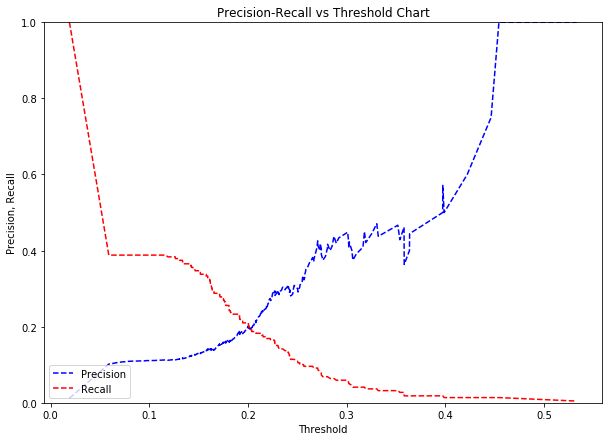

In [144]:
### Predict test_y values and probabilities based on fitted logistic regression model

pred_y=lr.predict(X_test_vec) 

probs_y=lr.predict_proba(X_test_vec) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first 
  # column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)

#pr_auc = metrics.auc(recall, precision)

plt.figure(figsize=(10, 7))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [199]:
threshold, upper, lower = 0.95, 1, 0

In [200]:
y_train_scores = np.where(y_train_pr > threshold, upper, lower)

In [201]:
y_test_scores = np.where(y_test_pr > threshold, upper, lower)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The Accuracy is: 0.99
The Missclassification Rate is: 0.01
The Sensitivity/Recall is: 0.0
The Specificity is: 1.0
The Precision is: nan
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     17999
         1.0       0.00      0.00      0.00       219

   micro avg       0.99      0.99      0.99     18218
   macro avg       0.49      0.50      0.50     18218
weighted avg       0.98      0.99      0.98     18218



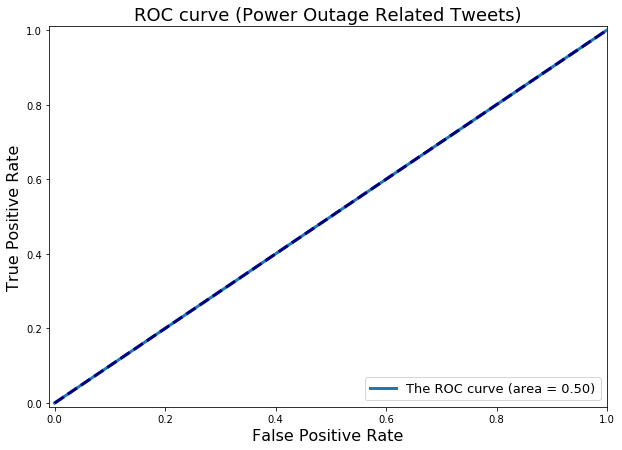

In [202]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_scores).ravel()



accuracy = round((tn + tp) / (tn + fp + fn + tp), 2)
misclassification = round((1 - accuracy), 2)
sensitivity = round((tp) / (tp + fn), 2)
specificity = round((tn) / (tn + fp), 2)
precision = round((tp) / (tp + fp), 2)

print(f'The Accuracy is: {accuracy}')
print(f'The Missclassification Rate is: {misclassification}')
print(f'The Sensitivity/Recall is: {sensitivity}')
print(f'The Specificity is: {specificity}')
print(f'The Precision is: {precision}')


fpr_clf, tpr_clf, _ = roc_curve(y_test, y_test_scores)
roc_auc_clf = auc(fpr_clf, tpr_clf)

plt.figure(figsize = (10, 7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_clf, tpr_clf, lw=3, label='The ROC curve (area = {:0.2f})'.format(roc_auc_clf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Power Outage Related Tweets)', fontsize=18)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

print(classification_report(y_test, y_test_scores))


In [210]:
from sklearn import svm

In [214]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train_tvec, y_train)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X_train_tvec, y_train)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [220]:
# plot the samples
plt.scatter(y_train_pr[:,0], y_train_pr[:,1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

IndexError: too many indices for array

In [212]:
svc = svm.SVC(class_weight={0: 0.3, 1: 0.7})


In [213]:
svc.fit(X_train_tvec, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight={0: 0.3, 1: 0.7}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [206]:
svc.score(X_train_tvec, y_train)

0.9879606250228712

In [207]:
svc.score(X_test_vec, y_test)

ValueError: cannot use sparse input in 'SVC' trained on dense data

## PCA

In [ ]:
features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
X_pca = df[features]

In [ ]:
ss = StandardScaler()
X_t = ss.fit_transform(X_pca)

In [ ]:
pca = PCA()

In [ ]:
pca.fit(X_t)

In [ ]:
Z = pca.transform(X_t)

In [ ]:
pd.DataFrame(Z).describe()

In [ ]:
plt.scatter(pd.DataFrame(Z[0]),
            pd.DataFrame(Z[1]));

In [ ]:
pca.explained_variance_

In [ ]:
var_exp = pca.explained_variance_ratio_

In [ ]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

In [ ]:
plt.figure(figsize=(9,7))

# Plot the cumulative explained variance
component_number = range(len(cum_var_exp))
plt.plot(component_number, cum_var_exp, lw=3)

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative variance explained\n', fontsize=20)

plt.show()

In [ ]:
pca = PCA(n_components=5)

In [ ]:
pca.fit(X_t)

In [ ]:
Z = pca.transform(X_t)

In [ ]:
pd.DataFrame(Z).describe()

In [ ]:
pd.DataFrame(Z).shape

In [ ]:
df_pca = pd.DataFrame(Z, 
                      columns=['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5'])

In [ ]:
df_pca.head()

In [ ]:
tvec = TfidfVectorizer(max_df=0.8,
                      max_features=500,
                      min_df=1,
                      ngram_range=(1,3))

X_vec = tvec.fit_transform(X)

In [ ]:
df_vec = pd.DataFrame(X_vec.todense(), columns=tvec.get_feature_names())

In [ ]:
df_vec.head()

In [ ]:
df_vec.join(df_pca).head()